In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA,QuadraticDiscriminantAnalysis)
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix

In [2]:
Smarket=pd.read_csv('Smarket.csv')

<Axes: >

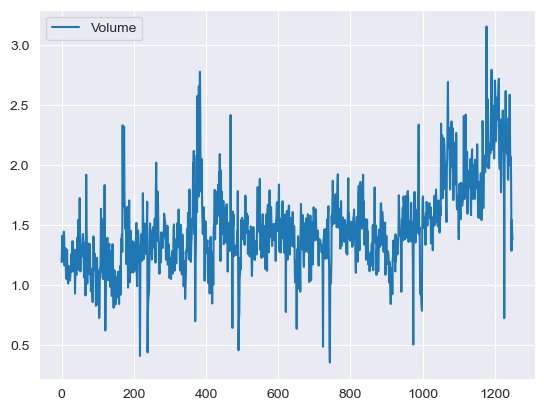

In [3]:
Smarket.plot(y='Volume')

<h1>Logistic Regression</h1>

In [4]:
x=Smarket.drop(['Today', 'Direction', 'Year'],axis=1)
x.insert(0,"intercept",1)
y=Smarket["Direction"] == "Up"
glm = sm.GLM(y,x,family=sm.families.Binomial())
results=glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Thu, 04 Jul 2024   Deviance:                       1727.6
Time:                        19:44:12   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1260      0.241     -0.523      0.6

In [5]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [6]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [7]:
probs = results.predict()
labels = np.array(['Down']*len(probs))
labels[probs >0.5] = "Up"
confusion_matrix(labels,Smarket.Direction)

array([[145, 141],
       [457, 507]], dtype=int64)

<h1>Linear Discriminant Analysis</h1>

In [8]:
Smarket_train = Smarket[Smarket.Year < 2005]
Smarket_test = Smarket[Smarket.Year >= 2005]
x_train=Smarket_train[["Lag1","Lag2"]]
x_test=Smarket_test[["Lag1","Lag2"]]
y_test=Smarket_test["Direction"]
y_train=Smarket_train["Direction"]

In [9]:
lda = LDA(store_covariance=True)
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [10]:
lda.score(x_test,y_test)

0.5595238095238095

In [11]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [12]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [13]:
lda.priors_

array([0.49198397, 0.50801603])

In [14]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [30]:
lda_pred = lda.predict(x_test)
lda_pred

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 

In [16]:
confusion_matrix(lda_pred,y_test)

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

<h1>Quadratic Discriminant Analysis</h1>

In [18]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

In [19]:
qda.fit(x_train,y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [20]:
qda.means_ , qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [21]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [23]:
qda_pred = qda.predict(x_test)
confusion_matrix(qda_pred , y_test)

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [25]:
np.mean(qda_pred == y_test)

0.5992063492063492

<h1>Naive Bayes</h1>

In [31]:
NB = GaussianNB()
NB.fit(x_train , y_train)

GaussianNB()

In [32]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [33]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [34]:
x_train[y_train == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [35]:
x_train[y_train == 'Down'].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [36]:
nb_labels = NB.predict(x_test)
confusion_matrix(nb_labels , y_test)

array([[ 29,  20],
       [ 82, 121]], dtype=int64)

<h1>K-Nearest Neighbors</h1>

In [37]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train , y_train)
knn1_pred = knn1.predict(x_test)
confusion_matrix(knn1_pred , y_test)

array([[43, 58],
       [68, 83]], dtype=int64)

In [39]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train , y_train)
knn1_pred = knn1.predict(x_test)
confusion_matrix(knn1_pred , y_test)

array([[48, 55],
       [63, 86]], dtype=int64)

In [47]:
Caravan = pd.read_csv('Caravan.csv')
Purchase = Caravan["Purchase"]
feature = Caravan.drop(["Purchase"], axis=1)

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [48]:
scaler = StandardScaler(with_mean=True, with_std=True,copy=True)
scaler.fit(feature)
x_std=scaler.transform(feature)
feature_std=pd.DataFrame(x_std,columns=feature.columns)

In [49]:
X_train ,X_test ,y_train ,y_test = train_test_split(feature_std ,Purchase ,test_size=1000,random_state=0)

In [50]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train ,y_train)
confusion_matrix(knn1.predict(X_test),y_test)

array([[881,  58],
       [ 52,   9]], dtype=int64)

In [61]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train , y_train).predict(X_test)
    C = confusion_matrix(knn_pred , y_test)
    print(f'K={K}: # predicted to rent: {C[1].sum()},' + f'    # who did rent {C[1][1]}, accuracy {C[1][1]/C[1].sum()*100}')

K=1: # predicted to rent: 61,    # who did rent 9, accuracy 14.754098360655737
K=2: # predicted to rent: 6,    # who did rent 1, accuracy 16.666666666666664
K=3: # predicted to rent: 19,    # who did rent 3, accuracy 15.789473684210526
K=4: # predicted to rent: 3,    # who did rent 0, accuracy 0.0
K=5: # predicted to rent: 7,    # who did rent 1, accuracy 14.285714285714285
